In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.fftpack import fft, ifft, fftfreq, fftshift, ifftshift

# Part 1

In [3]:
dt = 0.001 #sampling rate
t = np.arange(0,1,dt)
F=25

In [4]:
y = 5.*np.sin(2*np.pi*F*t) + 3.*np.sin(2*np.pi*.5*F*t)+ 12.*np.sin(2*np.pi*2*F*t)
len(y)

1000

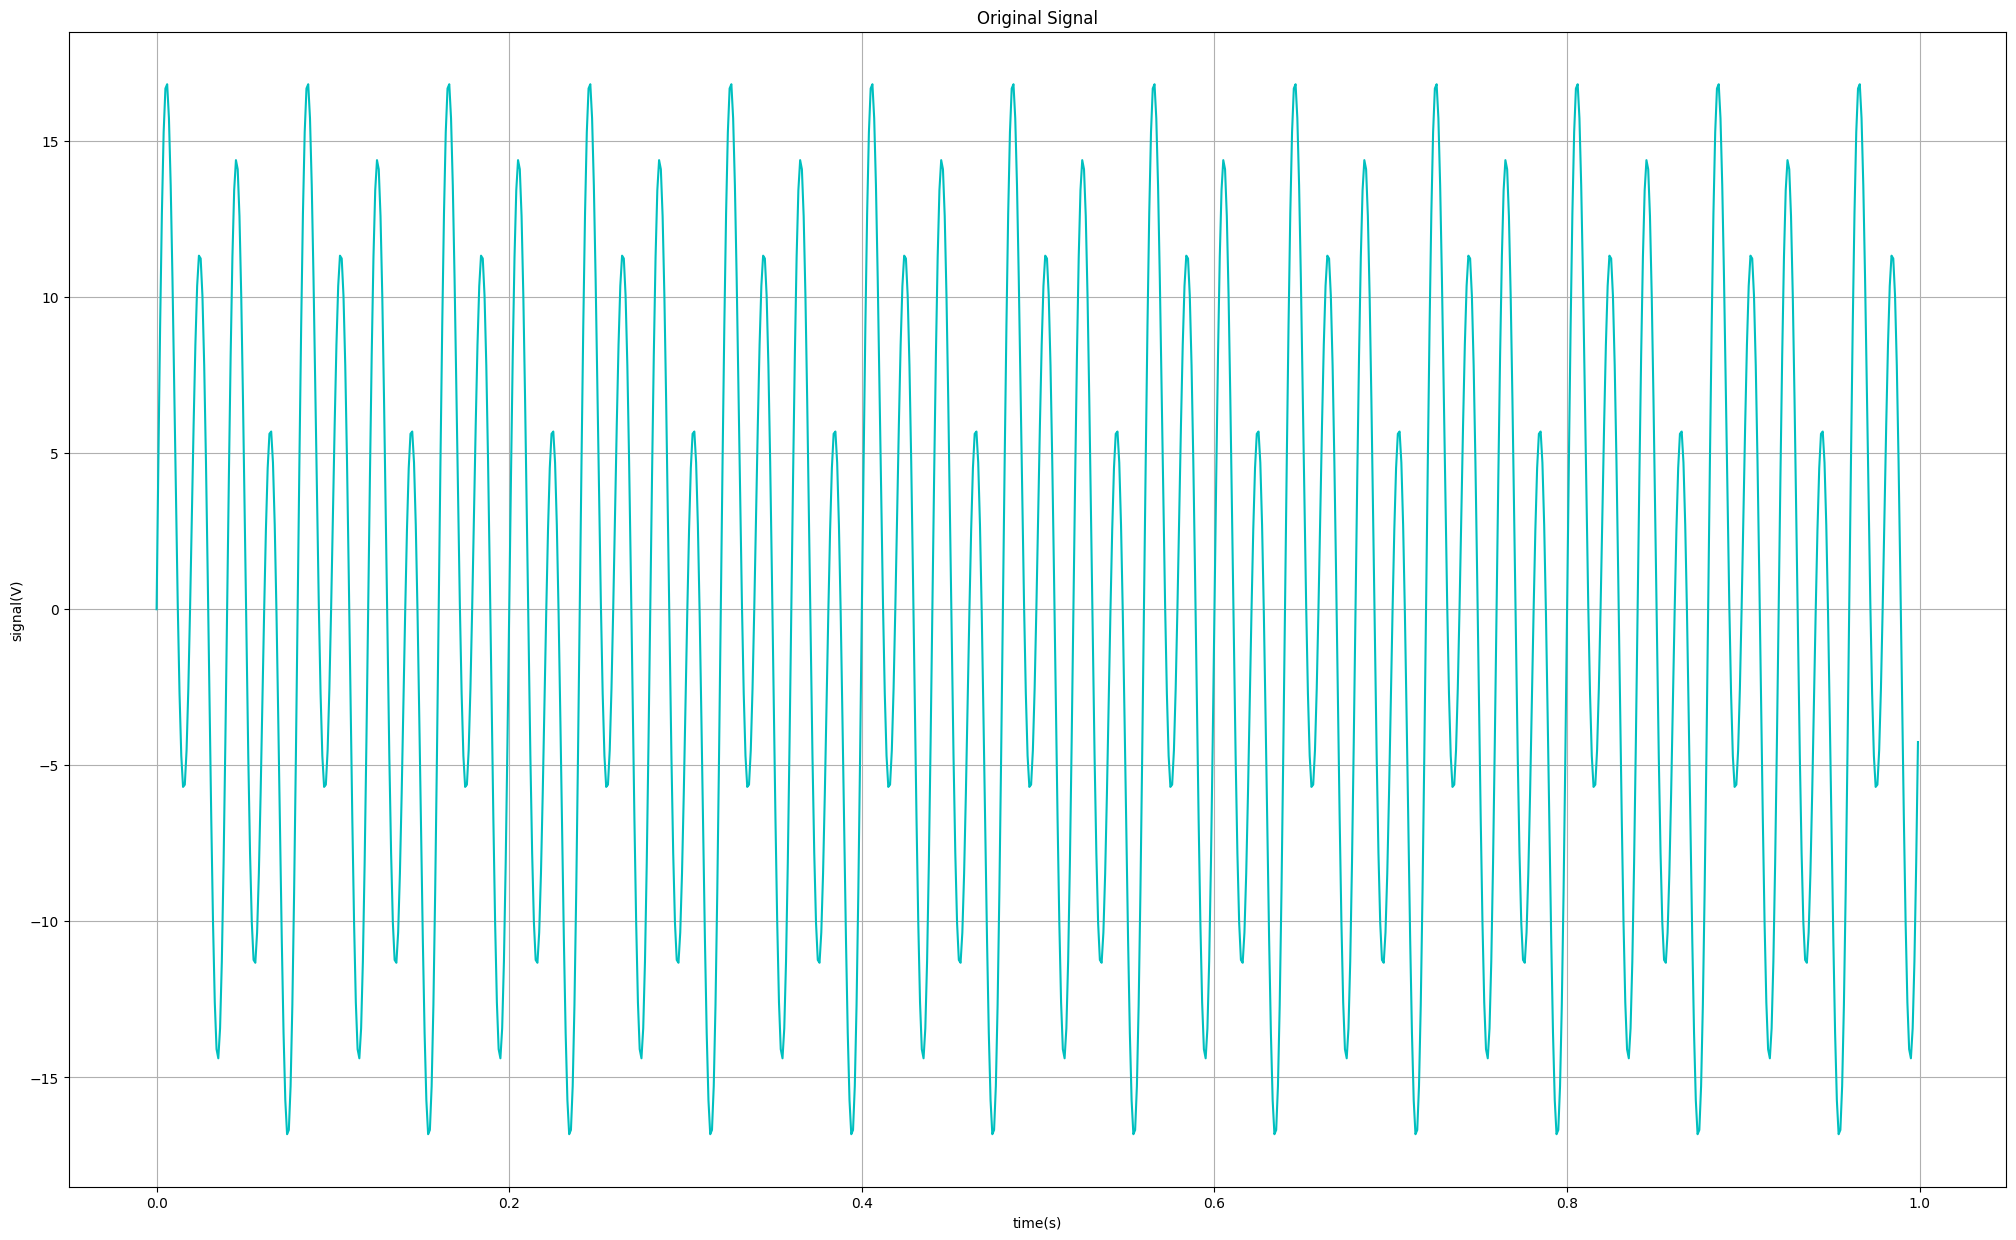

In [5]:
plt.figure(figsize=(25,15))
plt.plot(t,y,color='c')
plt.grid(True)
plt.xlabel("time(s)",position=(0.95,1))
plt.ylabel("signal(V)",position=(1,0.9))
plt.title("Original Signal")
ax = plt.gca()

plt.show()

In [6]:
noise = np.random.normal(0,5,len(y))
noisy = y + noise

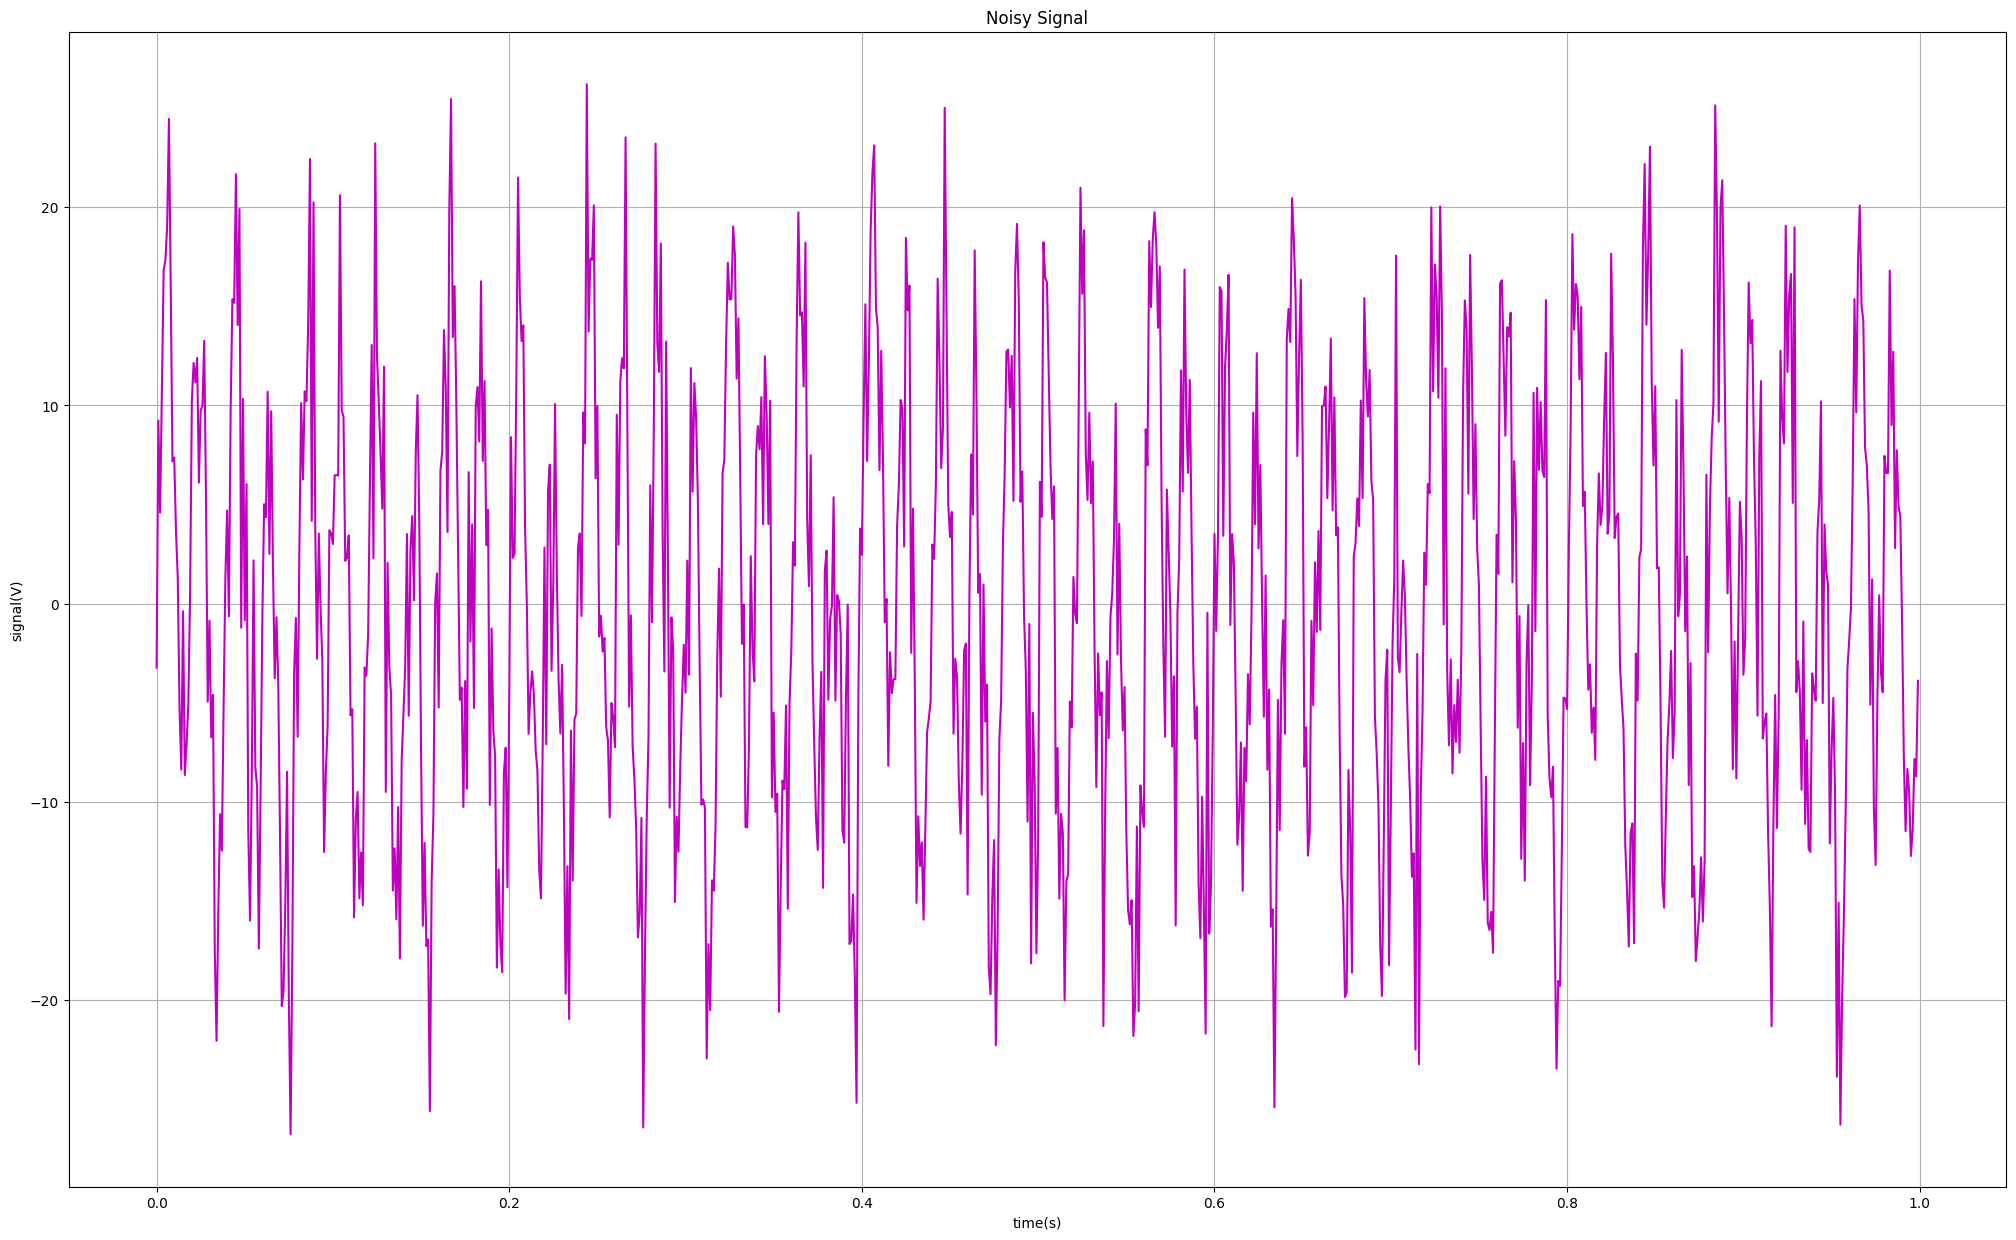

In [7]:
noise = np.random.normal(0,5,len(y))
noisy = y + noise

plt.figure(figsize=(25,15))
plt.plot(t,noisy,color='m')
#plt.plot(t,y,color='k')
plt.title("Noisy Signal")
plt.grid(True)
plt.xlabel("time(s)",position=(0.95,1))
plt.ylabel("signal(V)",position=(1,0.9))
ax = plt.gca()

plt.show()

In [8]:
n=len(noisy)
f_fft = np.fft.fft(noisy,n)
psd = f_fft * np.conj(f_fft)
freq = (1/(dt*n)) * np.arange(n) 
L = np.arange (1.,np.floor(n/2),dtype='int')

In [9]:
# plt.figure(figsize=(25,10))
# plt.grid(True)

# ax = plt.gca()
# plt.plot(freq[L],psd[L])
# plt.yticks(np.arange(0, 3.5e7, step=.1e7))
# plt.xticks(np.arange(0, 500, step=20))
# plt.xlabel("Frequency[Hz]",position=(0.95,1))
# plt.ylabel("PSD",position=(1,0.8))
# plt.show()

In [10]:
indices = psd > .1e7
cleaned = indices * psd
tbr = f_fft * indices


c:\Users\miniconda3\envs\tf\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


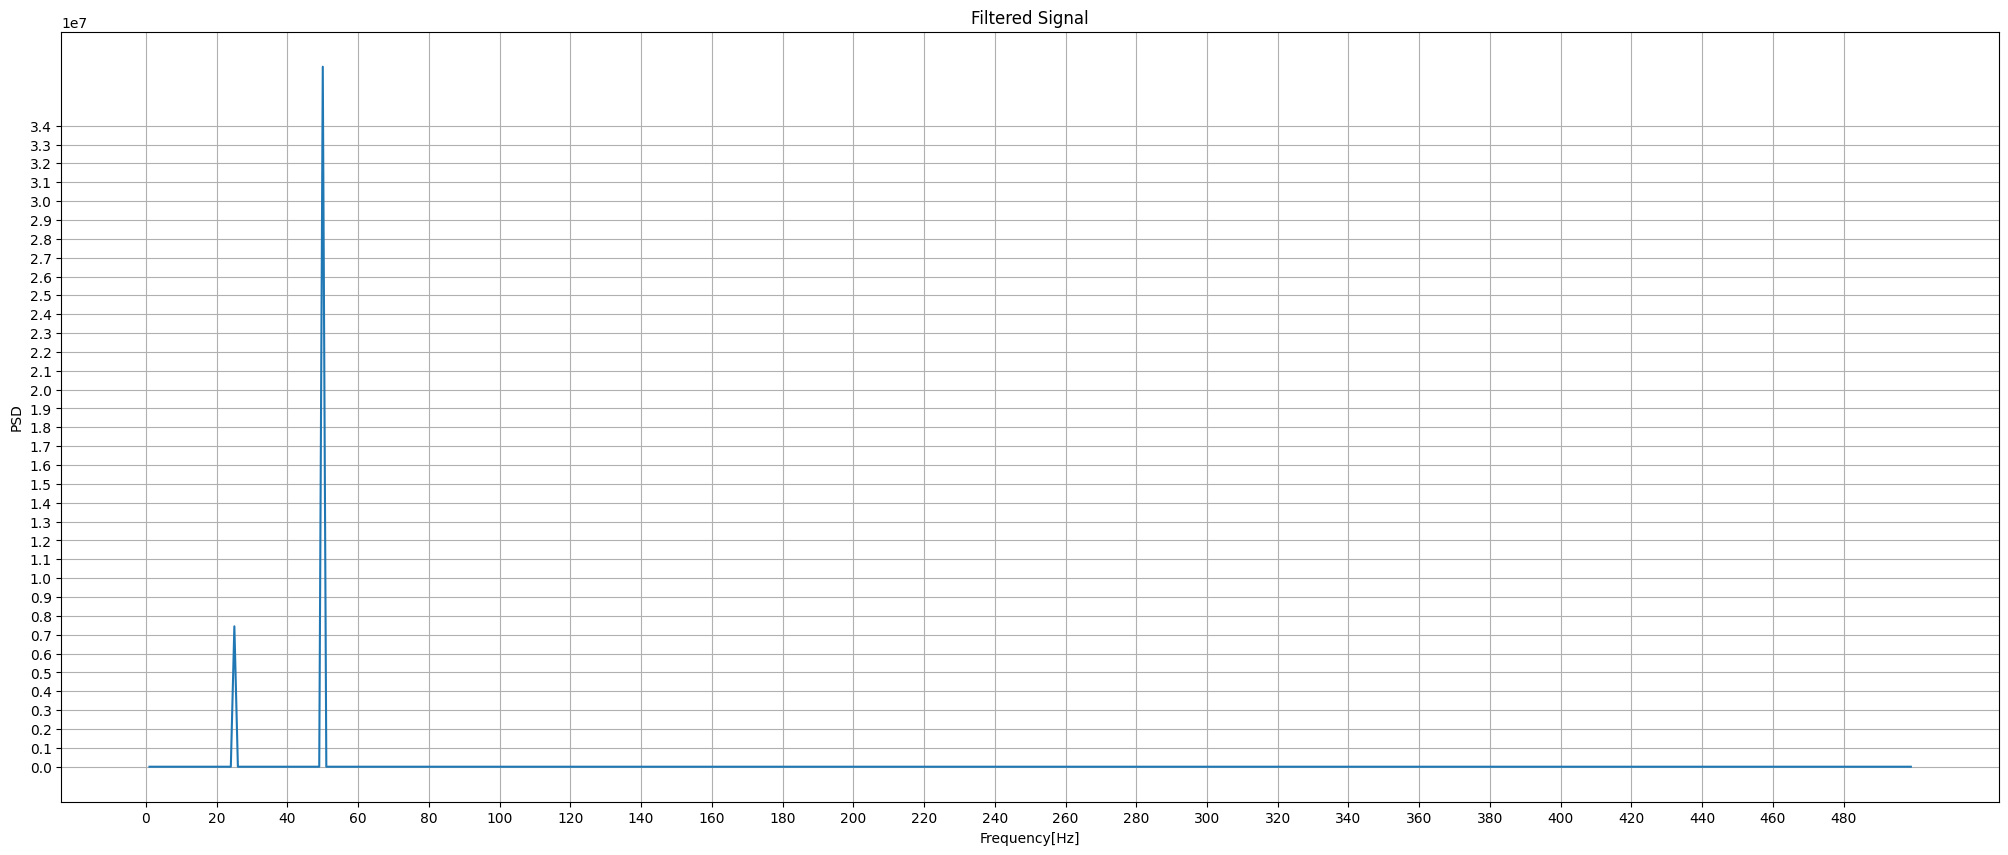

In [11]:
plt.figure(figsize=(25,10))
plt.grid(True)
ax = plt.gca()
plt.plot(freq[L],cleaned[L])
plt.title("Filtered Signal")
plt.yticks(np.arange(0, 3.5e7, step=.1e7))
plt.xticks(np.arange(0, 500, step=20))
plt.xlabel("Frequency[Hz]",position=(0.95,1))
plt.ylabel("PSD",position=(1,0.8))
plt.show()

In [12]:
recons=np.fft.ifft(tbr)

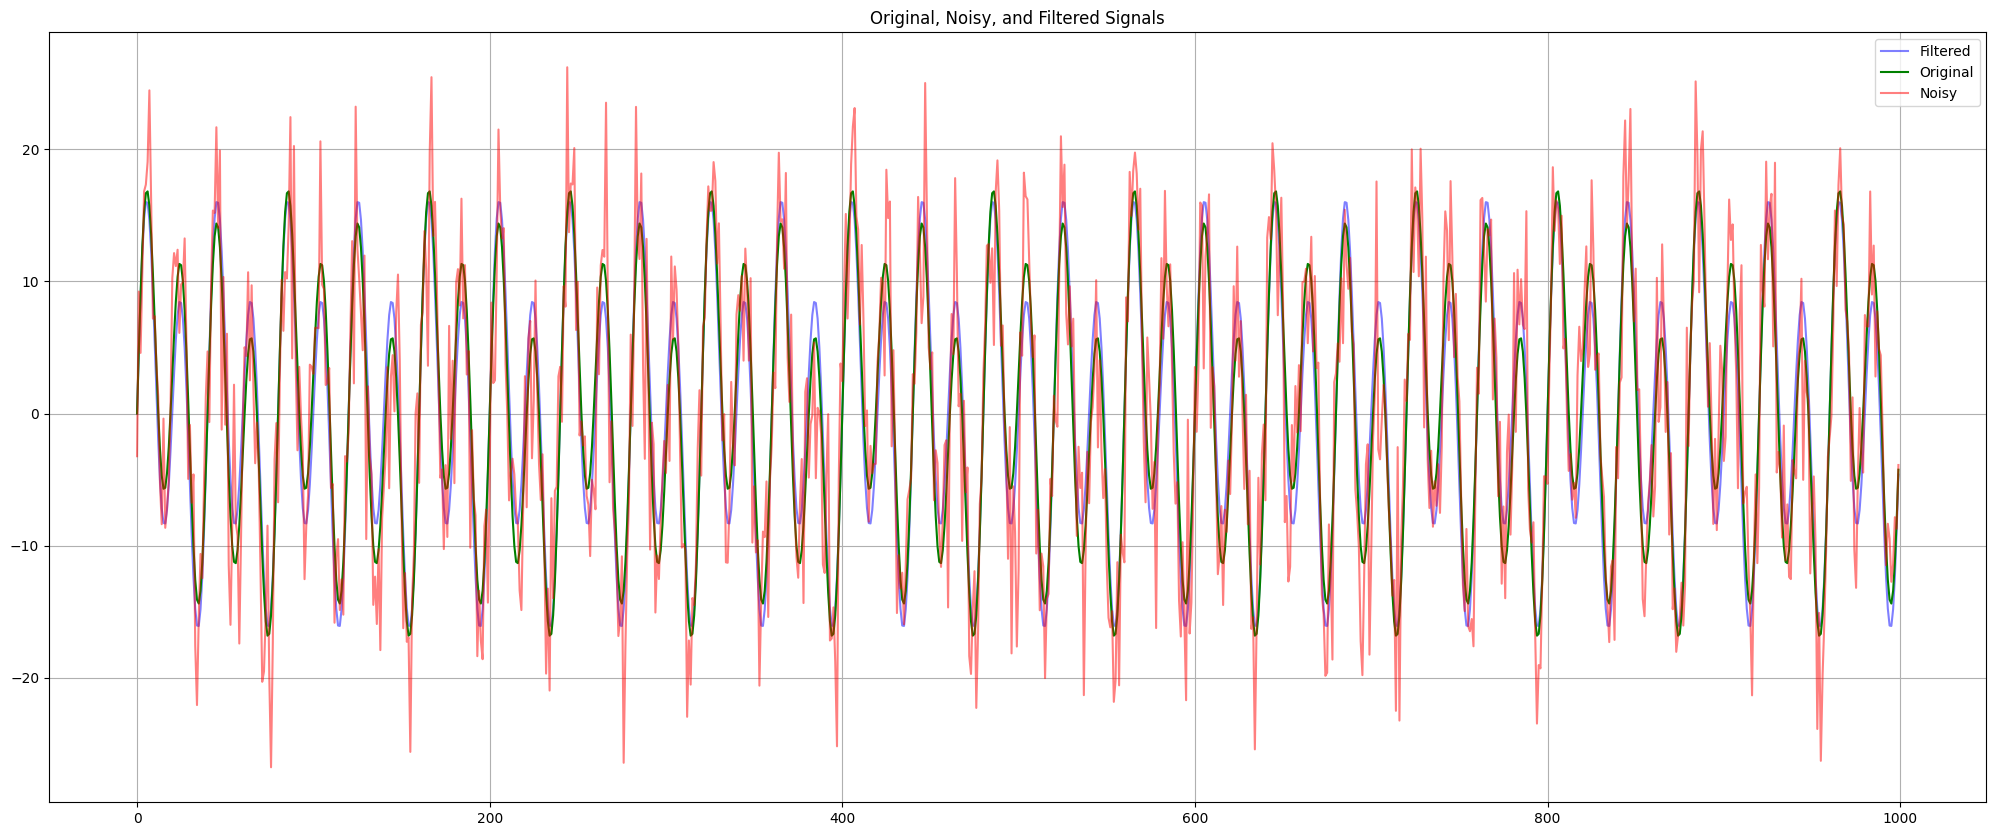

In [13]:
plt.figure(figsize=(25,10))
plt.plot(recons,color='b', alpha=0.5)
plt.plot(y,color='g')
plt.plot(noisy, color='r', alpha=0.5)

plt.legend(['Filtered','Original','Noisy'])

plt.title("Original, Noisy, and Filtered Signals")

plt.grid(True)
ax = plt.gca()

plt.show()

In [14]:
## SNR code
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [15]:
print("SNR")
print("       signaltonoise ratio for original signal %.4f: " % (signaltonoise(y, axis = 0, ddof = 0)))
print("       signaltonoise ratio for noisy signal %.4f: " % (signaltonoise(noisy, axis = 0, ddof = 0)))
print("       signaltonoise ratio for filtered signal %.17f: " % (signaltonoise(recons, axis = 0, ddof = 0).real))

SNR
       signaltonoise ratio for original signal 0.0081: 
       signaltonoise ratio for noisy signal -0.0045: 
       signaltonoise ratio for filtered signal -0.00000000000000001: 


# Part 2

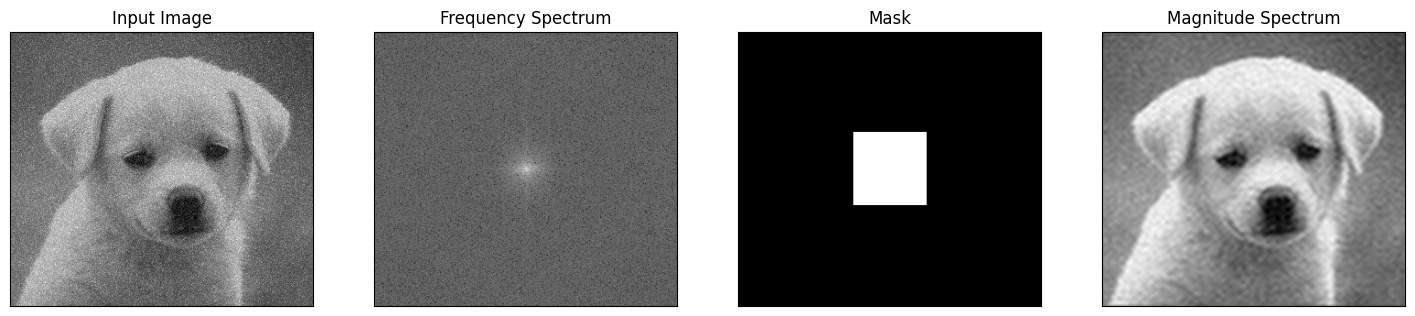

In [159]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# read the input image
# you can specify the path to image
image_path = r"phpMicl7E.png"
image = cv2.imread(image_path, 0)

# calculating the discrete Fourier transform or fast Fourier transform (same thing)
DFT = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

# reposition the zero-frequency component to the spectrum's middle
shift = np.fft.fftshift(DFT)
magnitude = cv2.normalize(20 * np.log(cv2.magnitude(shift[:, :, 0], shift[:, :, 1])), None, 0, 255, cv2.NORM_MINMAX,
                           cv2.CV_8UC1)
row, col = image.shape
center_row, center_col = row // 2, col // 2

# create a mask with a centered square of 1s
mask = np.zeros((row, col), dtype=np.uint8)
x = 40
y = 40
mask[center_row - x:center_row + x, center_col - y:center_col + y] = 1

# Apply the mask to the complex values
fft_shift = shift * mask[:, :, np.newaxis]

# Reposition the zero-frequency component back
fft_ifft_shift = np.fft.ifftshift(fft_shift)

# Perform the inverse DFT
imageThen = cv2.idft(fft_ifft_shift)

# Calculate the magnitude of the inverse DFT
imageThen_magnitude = cv2.magnitude(imageThen[:, :, 0], imageThen[:, :, 1])

# Visualize the original image and the magnitude spectrum
plt.figure(figsize=(18, 10))
plt.subplot(141), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(magnitude, cmap='gray')
plt.title('Frequency Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(imageThen_magnitude, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(mask, cmap='gray')
plt.title('Mask'), plt.xticks([]), plt.yticks([])
plt.show()
